In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/santiago/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/santiago/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import os
plt.style.use(os.path.join(os.getcwd(), 'mystyle.mplstyle') )
plt.rcParams['axes.edgecolor'] = 'w'

# Time Series analysis

In [38]:
import numpy as np

In [3]:
from pandas.io import data, wb
import scipy.stats as st
from statsmodels.tsa import stattools as stt
from statsmodels import tsa
import statsmodels.api as smapi
import datetime

/Users/santiago/anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)
/Users/santiago/anaconda/lib/python3.5/site-packages/pandas/io/wb.py:21: FutureWarning: 
The pandas.io.wb module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


## Introduction

In [4]:
def despine(axs):
    # to be able to handle subplot grids
    # it assumes the input is a list of 
    # axes instances, if it is not a list, 
    # it puts it in one
    if type(axs) != type([]):
        axs = [axs]
    for ax in axs:
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('outward', 10))
        ax.spines['left'].set_position(('outward', 10))

In [5]:
def is_stationary(df, maxlag=14, autolag=None, regression='ct'):
    """Run the Augmented Dickey-Fuller test from statsmodels
    and print output.
    """
    outpt = stt.adfuller(df,maxlag=maxlag, autolag=autolag,
                            regression=regression)
    print('adf\t\t {0:.3f}'.format(outpt[0]))
    print('p\t\t {0:.3g}'.format(outpt[1]))
    print('crit. val.\t 1%: {0:.3f}, \
5%: {1:.3f}, 10%: {2:.3f}'.format(outpt[4]["1%"], 
                                     outpt[4]["5%"], outpt[4]["10%"]))
    print('stationary?\t {0}'.format(['true', 'false']\
                                   [outpt[0]>outpt[4]['5%']]))
    return outpt

## example 1 - trends, cycles and seasons

### the data

In [6]:
%more data/mean-daily-temperature-fisher-river.csv

In [7]:
dateparse = lambda d: pd.datetime.strptime(d, '%Y-%m-%d')

In [9]:
temp = pd.read_csv('data/mean-daily-temperature-fisher-river.csv',
                   parse_dates=['Date'], 
                   index_col='Date', 
                   date_parser=dateparse,
                   )

In [10]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 1988-01-01 to 1991-12-31
Data columns (total 1 columns):
Temp    1461 non-null float64
dtypes: float64(1)
memory usage: 22.8 KB


In [11]:
temp.head()

,Temp
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


In [12]:
temp = temp.iloc[:,0]

In [14]:
type(temp)

pandas.core.series.Series

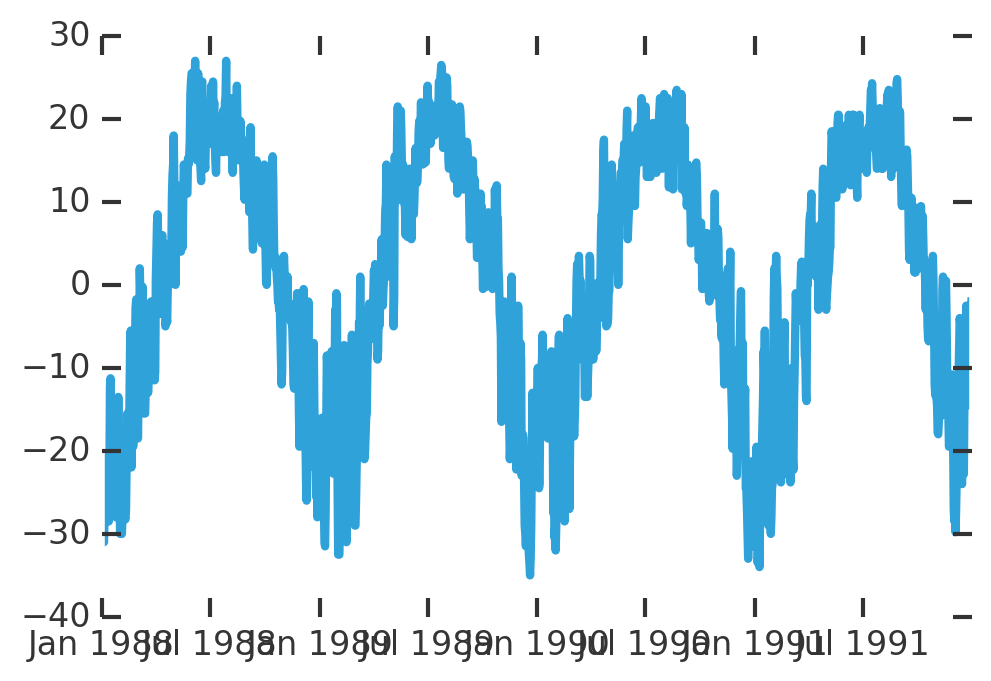

In [84]:
plt.plot(temp)

In [15]:
temp.head()

Date
1988-01-01   -23.0
1988-01-02   -20.5
1988-01-03   -22.0
1988-01-04   -30.5
1988-01-05   -31.0
Name: Temp, dtype: float64

In [16]:
temp.index

DatetimeIndex(['1988-01-01', '1988-01-02', '1988-01-03', '1988-01-04',
               '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
               '1988-01-09', '1988-01-10',
               ...
               '1991-12-22', '1991-12-23', '1991-12-24', '1991-12-25',
               '1991-12-26', '1991-12-27', '1991-12-28', '1991-12-29',
               '1991-12-30', '1991-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

In [17]:
temp.dtypes

dtype('float64')

In [19]:
temp['1988-01']

Date
1988-01-01   -23.00
1988-01-02   -20.50
1988-01-03   -22.00
1988-01-04   -30.50
1988-01-05   -31.00
1988-01-06   -27.50
1988-01-07   -26.25
1988-01-08   -26.50
1988-01-09   -23.00
1988-01-10   -23.50
1988-01-11   -27.00
1988-01-12   -26.50
1988-01-13   -28.50
1988-01-14   -24.25
1988-01-15   -12.25
1988-01-16   -11.25
1988-01-17   -17.50
1988-01-18   -18.00
1988-01-19   -15.50
1988-01-20   -19.50
1988-01-21   -15.00
1988-01-22   -21.00
1988-01-23   -21.00
1988-01-24   -20.00
1988-01-25   -28.00
1988-01-26   -26.50
1988-01-27   -23.50
1988-01-28   -19.25
1988-01-29   -13.50
1988-01-30   -19.00
1988-01-31   -25.50
Name: Temp, dtype: float64

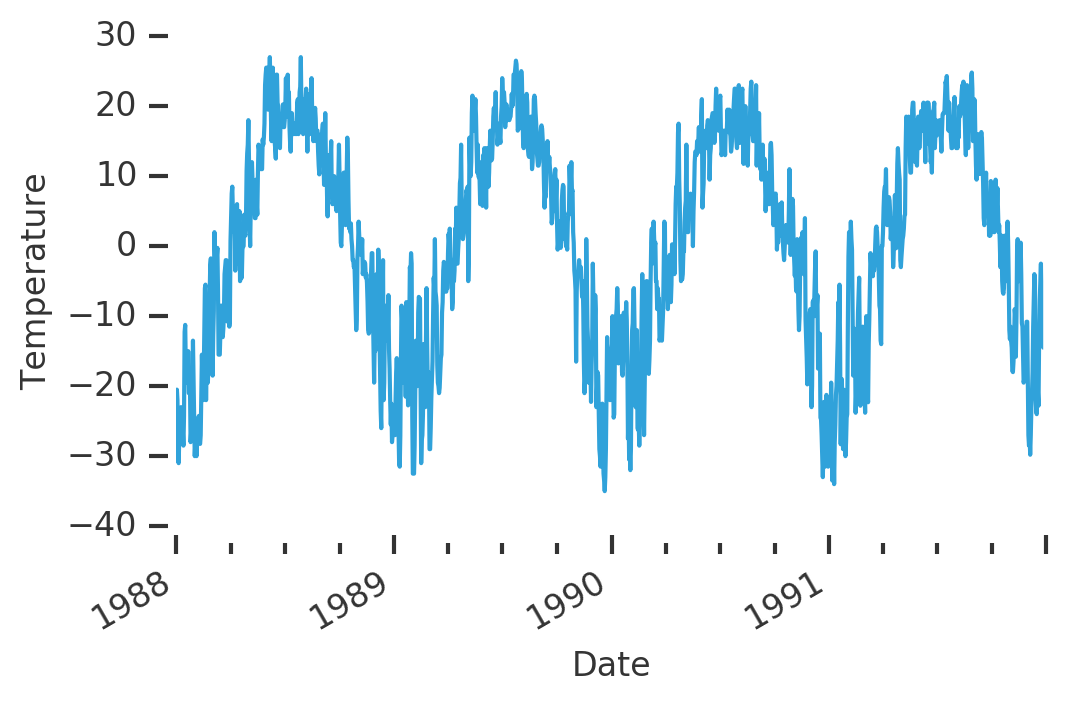

In [20]:
temp.plot(lw=1.5)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature');

In [21]:
temp.describe()

count    1461.000000
mean        0.803320
std        15.154634
min       -35.000000
25%       -11.250000
50%         2.000000
75%        14.500000
max        27.000000
Name: Temp, dtype: float64

### Slicing

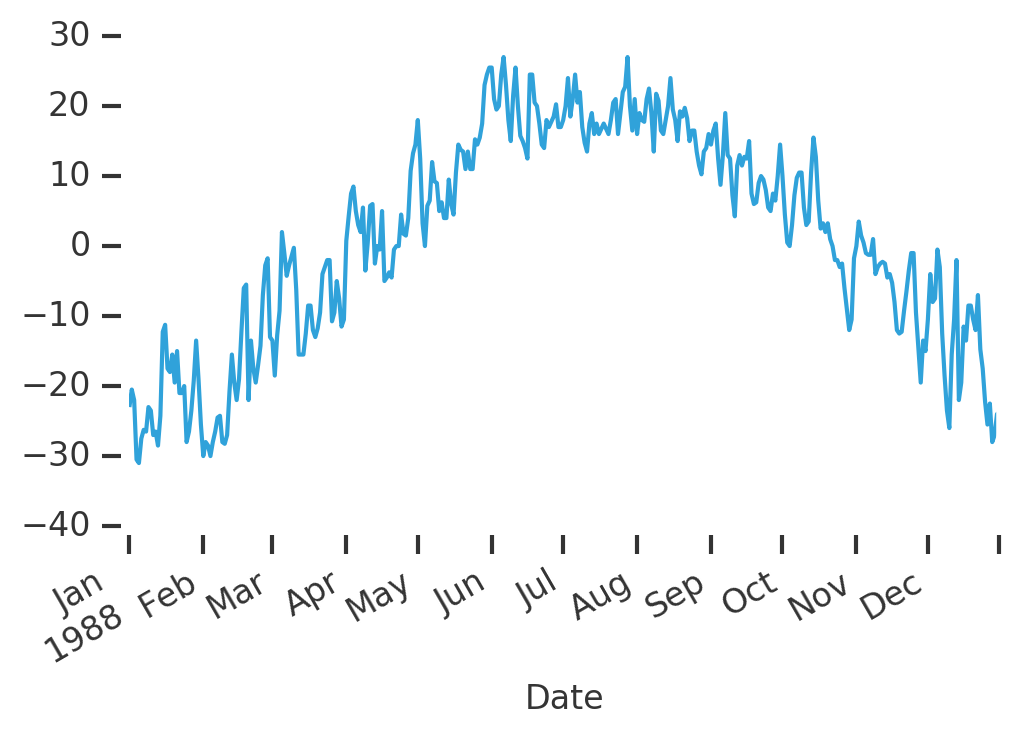

In [22]:
temp['1988'].plot(lw=1.5)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.minorticks_off()

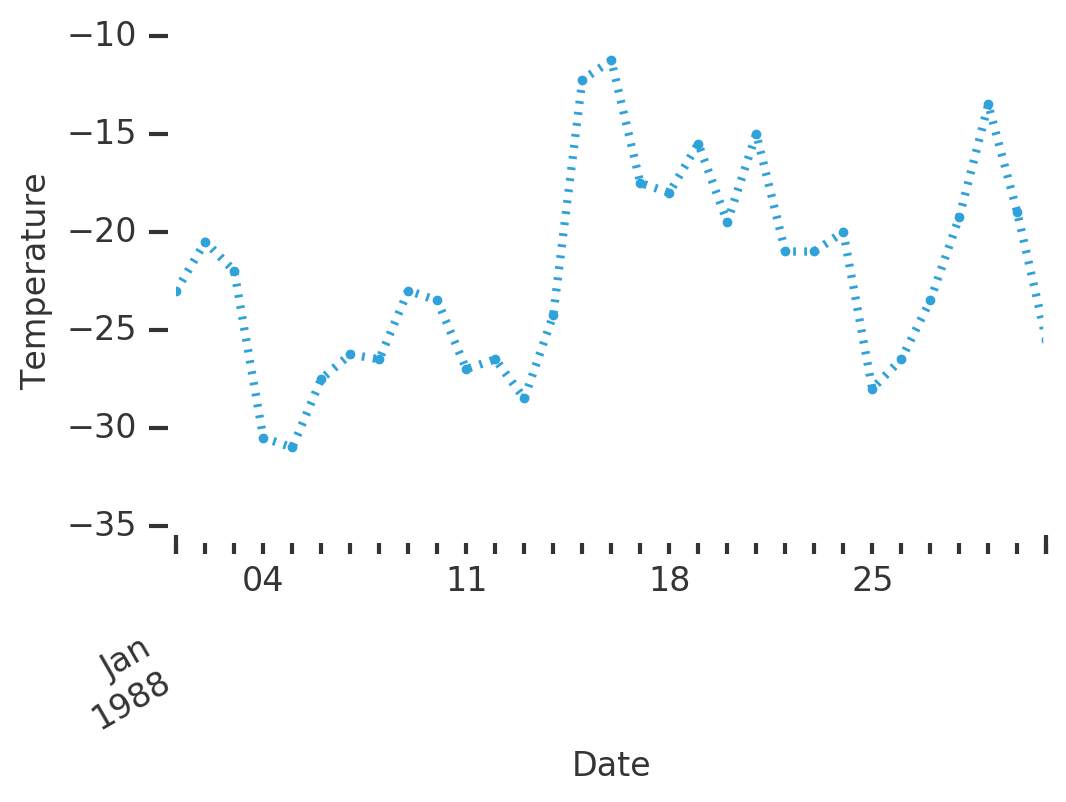

In [23]:
temp['1988-01'].plot(ls='dotted', marker='.')
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature');

In [24]:
temp[temp < -25].head()

Date
1988-01-04   -30.50
1988-01-05   -31.00
1988-01-06   -27.50
1988-01-07   -26.25
1988-01-08   -26.50
Name: Temp, dtype: float64

In [25]:
temp['1988'].index

DatetimeIndex(['1988-01-01', '1988-01-02', '1988-01-03', '1988-01-04',
               '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
               '1988-01-09', '1988-01-10',
               ...
               '1988-12-22', '1988-12-23', '1988-12-24', '1988-12-25',
               '1988-12-26', '1988-12-27', '1988-12-28', '1988-12-29',
               '1988-12-30', '1988-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

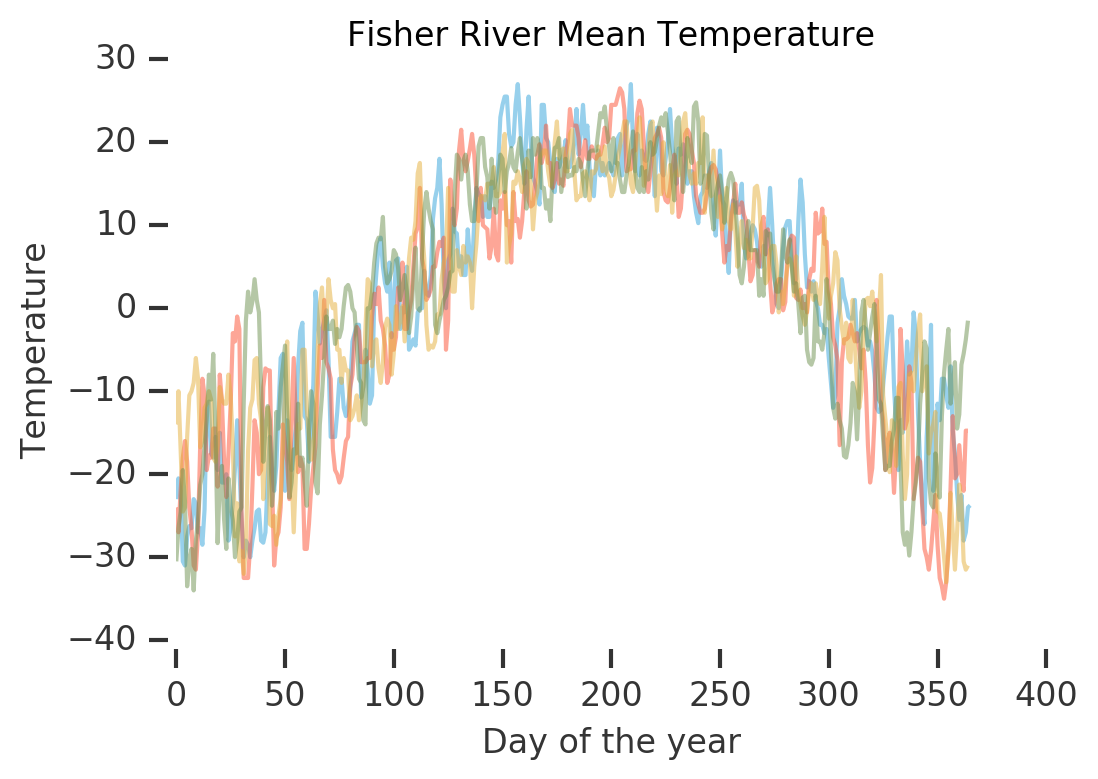

In [26]:
kws = dict(lw=1.5, alpha=0.5)
plt.plot(temp['1988'].values, **kws)
plt.plot(temp['1989'].values, **kws)
plt.plot(temp['1990'].values, **kws)
plt.plot(temp['1991'].values, **kws)
despine(plt.gca())
plt.xlabel('Day of the year')
plt.ylabel('Temperature')
plt.title('Fisher River Mean Temperature');

### Resampling, smooting, rolling means

In [27]:
temp.resample('A').head()

/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


Date
1988-12-31    1.138661
1989-12-31   -0.006164
1990-12-31    0.815753
1991-12-31    1.264110
Freq: A-DEC, Name: Temp, dtype: float64

In [28]:
pd.__version__

'0.18.1'

/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app
/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  app.launch_new_instance()


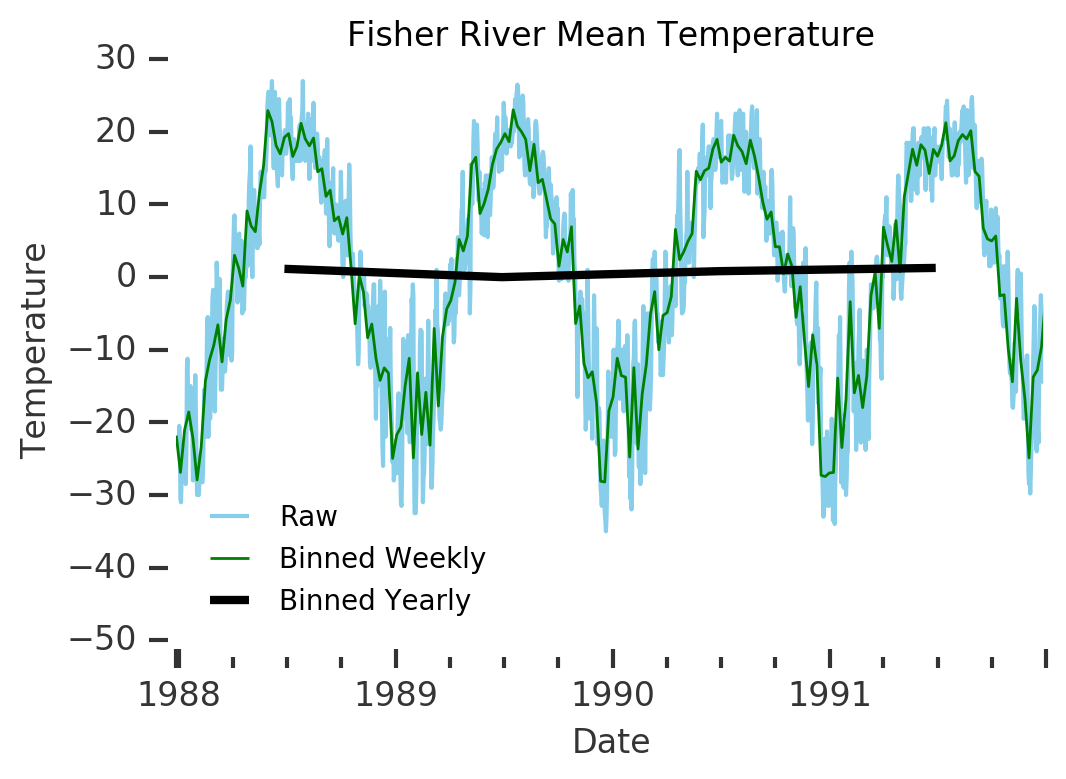

In [29]:
temp.plot(lw=1.5, color='SkyBlue')
temp.resample('W').plot(lw=1, color='Green')
temp.resample('AS', loffset='178 D').plot(color='k')
plt.ylim(-50,30)
plt.ylabel('Temperature')
plt.title('Fisher River Mean Temperature')
plt.legend(['Raw', 'Binned Weekly', 'Binned Yearly'], loc=3)
despine(plt.gca());

/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app
/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


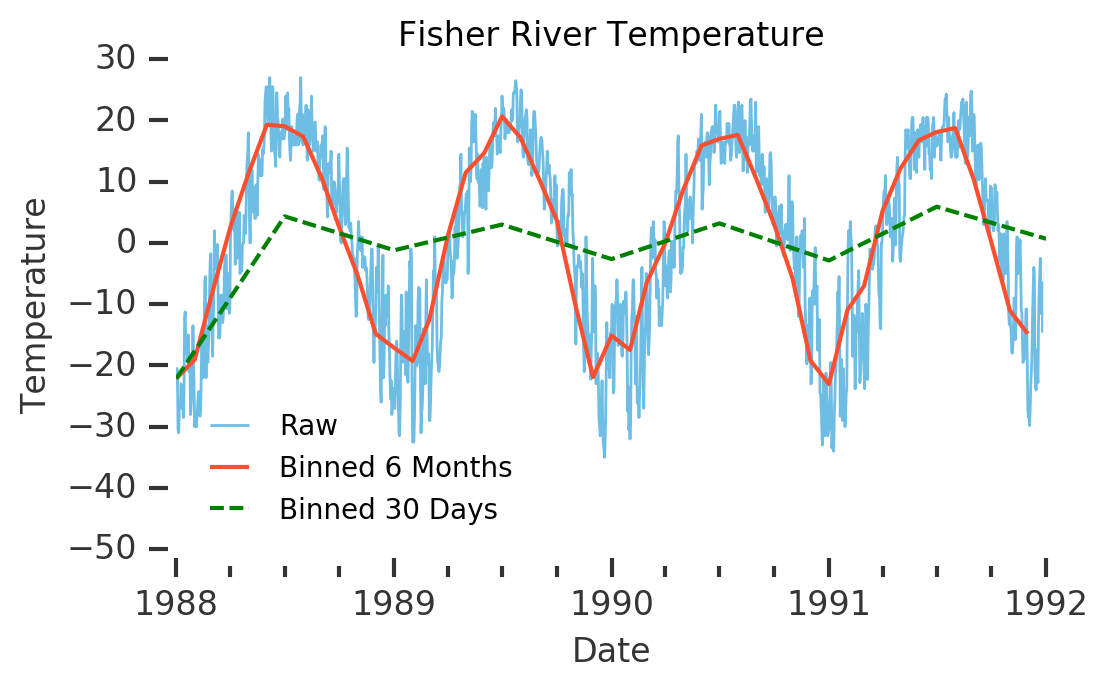

In [30]:
temp.plot(lw=1, alpha=0.7)
temp.resample('M').plot(lw=1.5, zorder=32)
temp.resample('6M').plot(lw=1.5, dashes=(5,2), 
                         zorder=32, color='Green')
plt.gcf().autofmt_xdate()
despine(plt.gca())
plt.ylim(-50,30)
plt.ylabel('Temperature')
plt.title('Fisher River Temperature')
plt.legend(['Raw', 'Binned 6 Months ', 'Binned 30 Days'], loc=3);

/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=60).mean()
  from ipykernel import kernelapp as app
/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


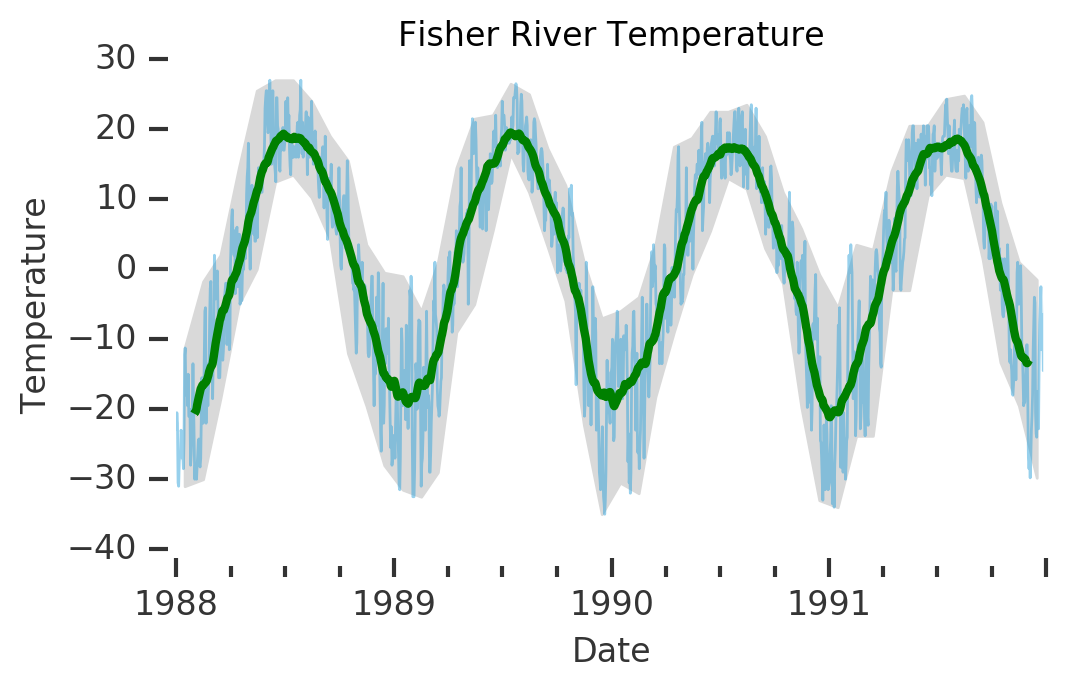

In [31]:
temp.plot(lw=1, alpha=0.5)
pd.rolling_mean(temp, center=True, window=60).plot(color='Green')
plt.fill_between(temp.resample('M', label='left', 
                               loffset='15 D').index,
                 y1=temp.resample('M', how='max').values,
                 y2=temp.resample('M', how='min').values,
                 color='0.85',
                 )
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature')
despine(plt.gca())
plt.title('Fisher River Temperature');

/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).cov(other=<Series>,pairwise=True)
  if __name__ == '__main__':


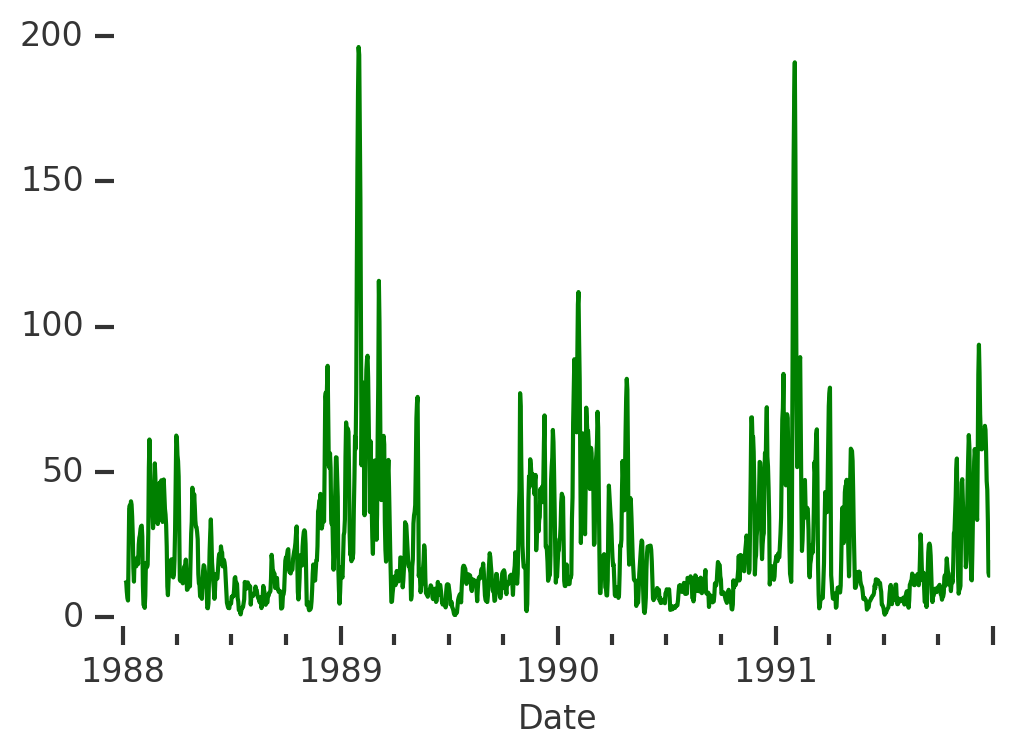

In [32]:
pd.rolling_cov(temp, center=True, window=10).plot(color='Green',
                                                 lw=1.5)
despine(plt.gca());

/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=14).var()
  if __name__ == '__main__':


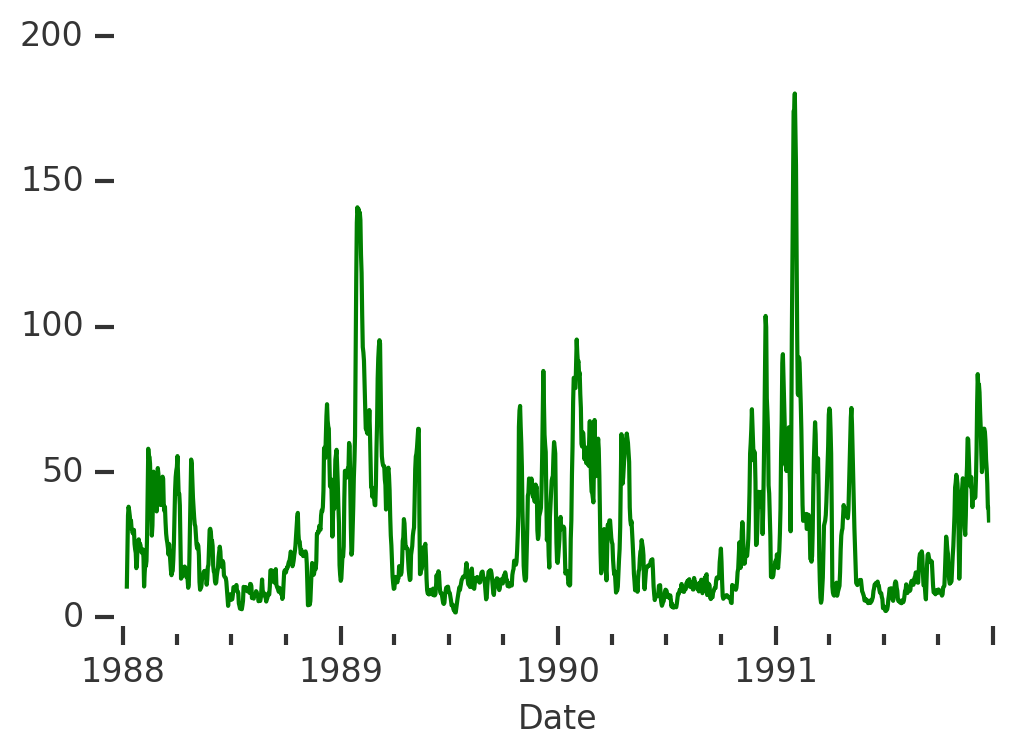

In [33]:
pd.rolling_var(temp, center=True, window=14).plot(color='Green',
                                                 lw=1.5)
despine(plt.gca());

In [34]:
temp.index

DatetimeIndex(['1988-01-01', '1988-01-02', '1988-01-03', '1988-01-04',
               '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
               '1988-01-09', '1988-01-10',
               ...
               '1991-12-22', '1991-12-23', '1991-12-24', '1991-12-25',
               '1991-12-26', '1991-12-27', '1991-12-28', '1991-12-29',
               '1991-12-30', '1991-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

---

this below is not going in book atm.

In [35]:
temp_residual = temp-pd.rolling_mean(temp, center=True, window=60)

/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=60).mean()
  if __name__ == '__main__':


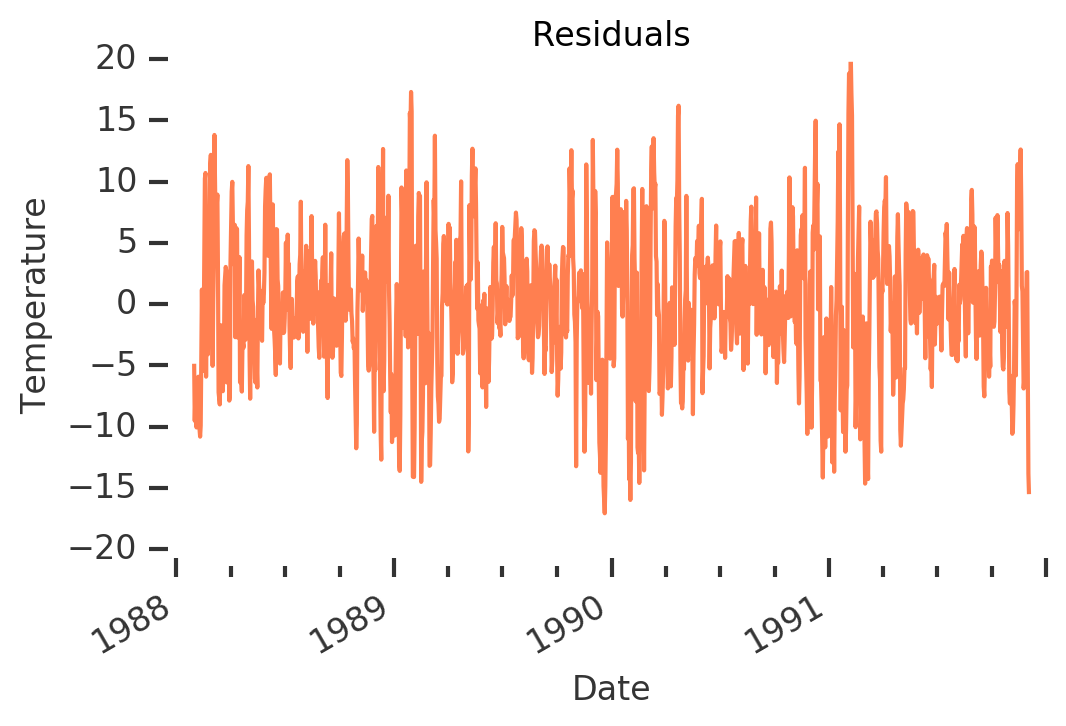

In [36]:
temp_residual.plot(lw=1.5, color='Coral')
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.title('Residuals')
plt.ylabel('Temperature');

/Users/santiago/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=14).var()
  if __name__ == '__main__':


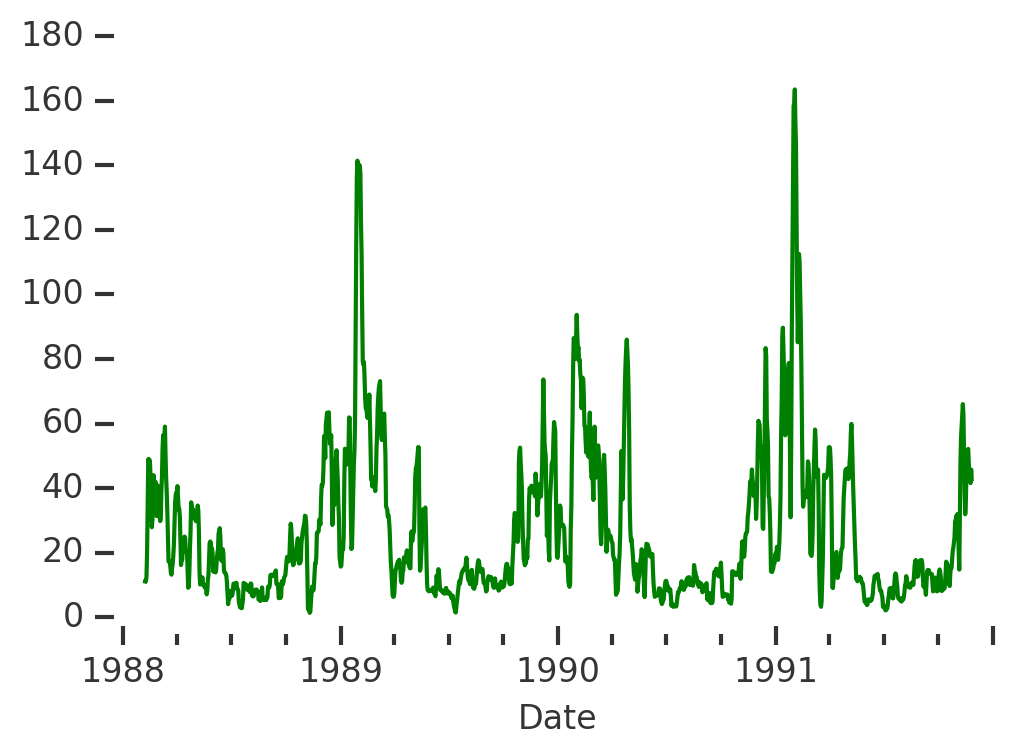

In [37]:
pd.rolling_var(temp_residual, center=True, window=14).plot(color='Green',
                                                 lw=1.5)
despine(plt.gca());

## Stationarity, seasonality, trends etc

In [39]:
def is_stationary(df, maxlag=14, autolag=None, regression='ct'):
    """Run the Augmented Dickey-Fuller test from statsmodels
    and print output.
    """
    outpt = stt.adfuller(df,maxlag=maxlag, autolag=autolag,
                            regression=regression)
    print('adf\t\t {0:.3f}'.format(outpt[0]))
    print('p\t\t {0:.3g}'.format(outpt[1]))
    print('crit. val.\t 1%: {0:.3f}, \
5%: {1:.3f}, 10%: {2:.3f}'.format(outpt[4]["1%"], 
                                     outpt[4]["5%"], outpt[4]["10%"]))
    print('stationary?\t {0}'.format(['true', 'false']\
                                   [outpt[0]>outpt[4]['5%']]))
    return outpt

### the data

In [40]:
%more data/monthly-car-sales-in-quebec-1960.csv

In [41]:
carsales = pd.read_csv('data/monthly-car-sales-in-quebec-1960.csv',
                   parse_dates=['Month'], 
                   index_col='Month', 
                   date_parser=lambda d: pd.datetime.strptime(d, '%Y-%m'),
                   )

In [42]:
carsales.head()

,Monthly car sales in Quebec 1960-1968
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [43]:
carsales = carsales.iloc[:,0]

In [44]:
carsales.index

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1968-03-01', '1968-04-01', '1968-05-01', '1968-06-01',
               '1968-07-01', '1968-08-01', '1968-09-01', '1968-10-01',
               '1968-11-01', '1968-12-01'],
              dtype='datetime64[ns]', name='Month', length=108, freq=None)

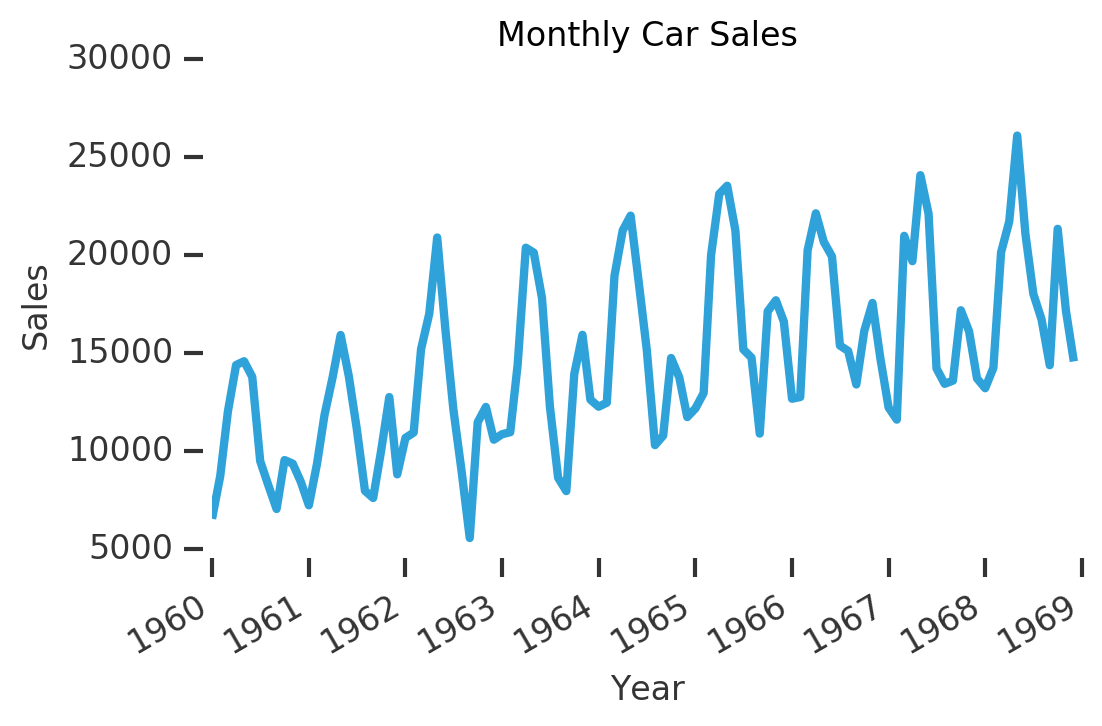

In [45]:
plt.plot(carsales)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xlim('1960','1969')
plt.title('Monthly Car Sales');

### testing for stationarity

In [46]:
is_stationary(carsales);

adf		 -1.673
p		 0.763
crit. val.	 1%: -4.060, 5%: -3.459, 10%: -3.155
stationary?	 false


### decomposing time series components

#### with statsmodels.seasonal decompose

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
carsales_decomp = seasonal_decompose(carsales, freq=12)

/Users/santiago/anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


In [48]:
carsales_trend = carsales_decomp.trend
carsales_seasonal = carsales_decomp.seasonal
carsales_residual = carsales_decomp.resid

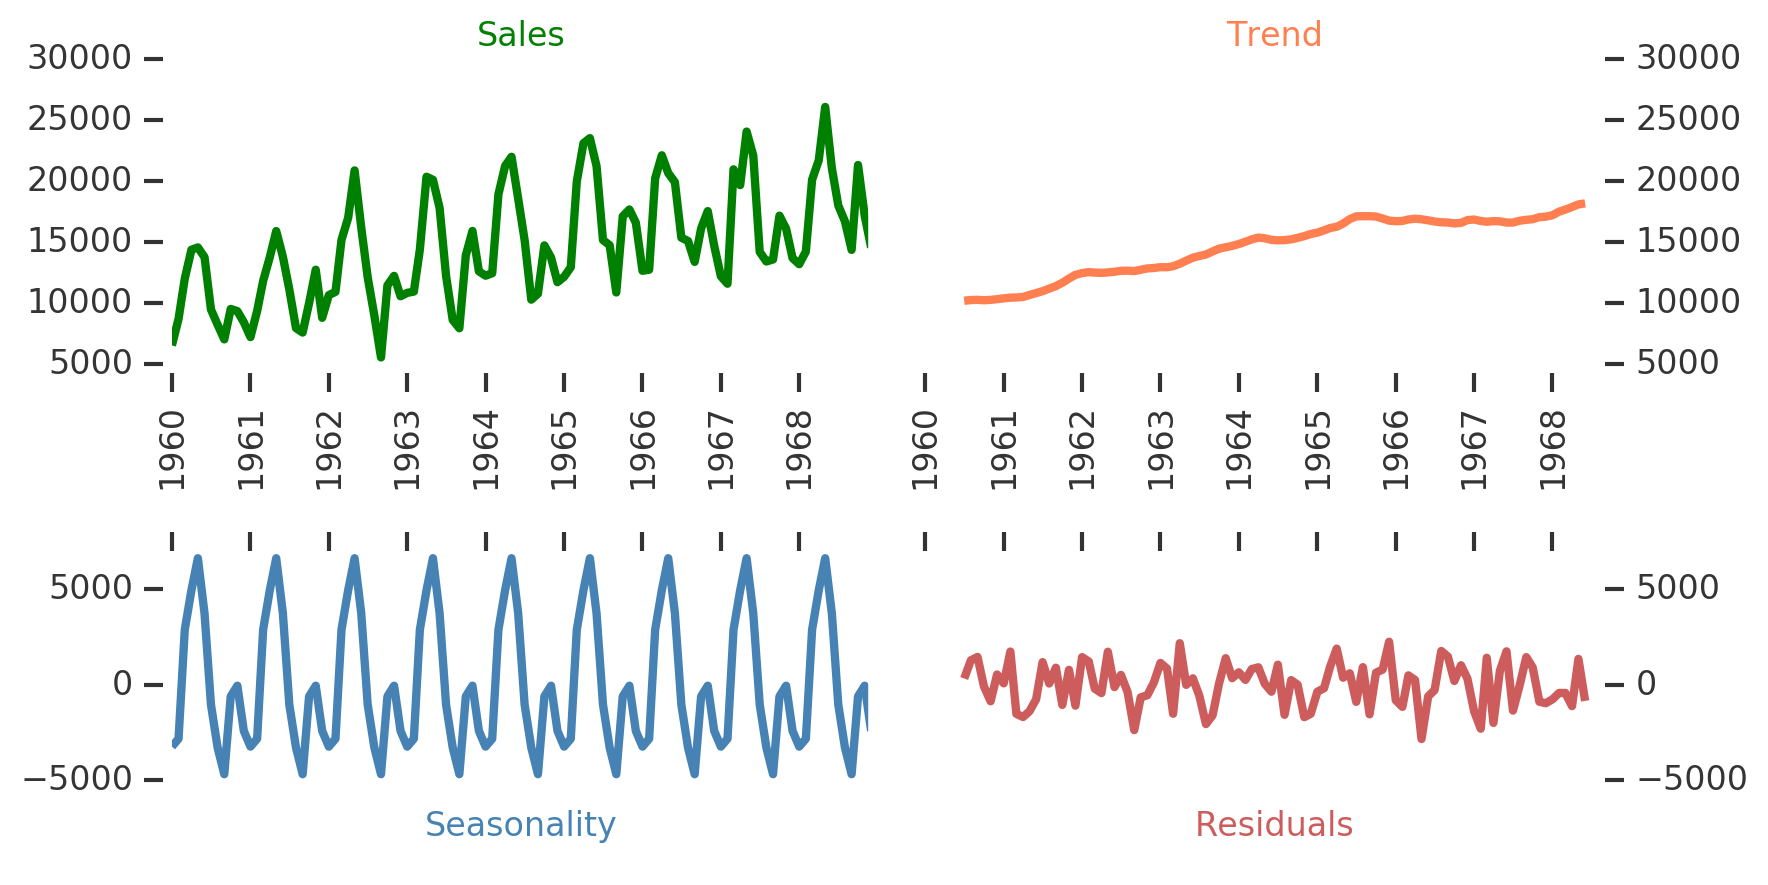

In [49]:
def change_plot(ax):
    despine(ax)
    ax.locator_params(axis='y', nbins=5)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')

plt.figure(figsize=(9,4.5))

plt.subplot(221)
plt.plot(carsales, color='Green')
change_plot(plt.gca())
plt.title('Sales', color='Green')
xl = plt.xlim()
yl = plt.ylim()

plt.subplot(222)
plt.plot(carsales.index,carsales_trend, 
         color='Coral')
change_plot(plt.gca())
plt.title('Trend', color='Coral')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlim(xl)
plt.ylim(yl)

plt.subplot(223)
plt.plot(carsales.index,carsales_seasonal, 
         color='SteelBlue')
change_plot(plt.gca())
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.xlabel('Seasonality', color='SteelBlue', labelpad=-20)
plt.xlim(xl)
plt.ylim((-8000,8000))

plt.subplot(224)
plt.plot(carsales.index,carsales_residual,
        color='IndianRed')
change_plot(plt.gca())
plt.xlim(xl)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.ylim((-8000,8000))
plt.xlabel('Residuals', color='IndianRed', labelpad=-20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.55)

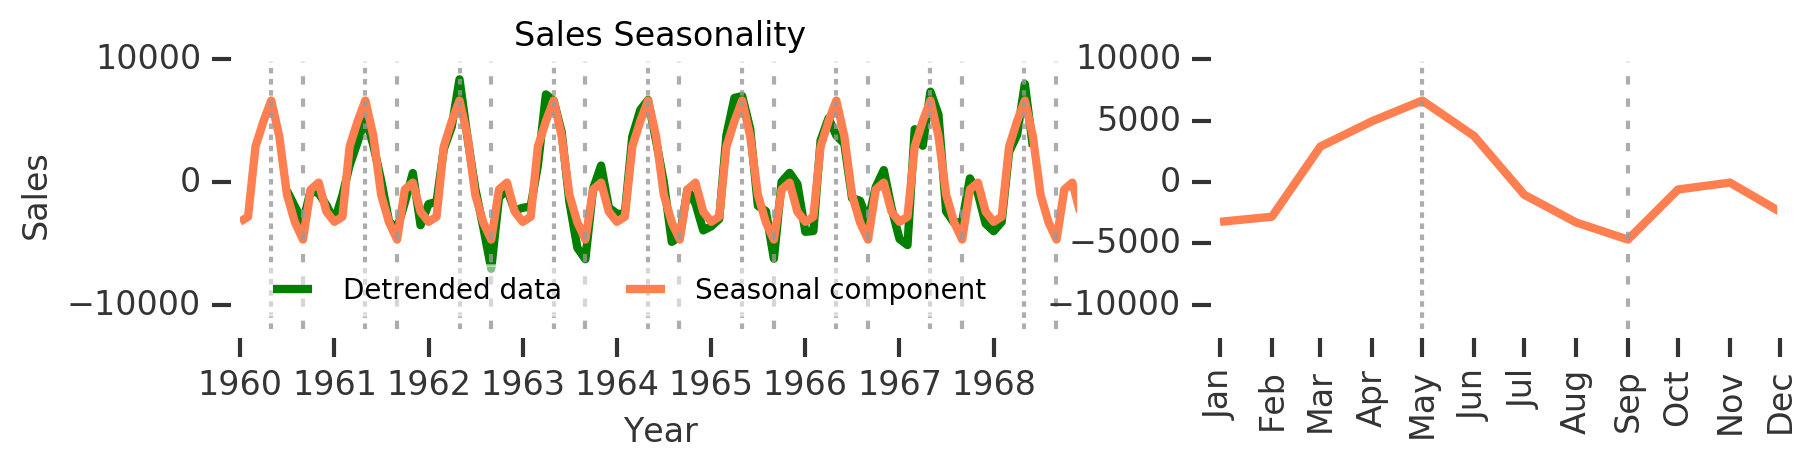

In [50]:
fig = plt.figure(figsize=(7,1.5) )

ax1 = fig.add_axes([0.1,0.1,0.6,0.9])
ax1.plot(carsales-carsales_trend, 
         color='Green', label='Detrended data')
ax1.plot(carsales_seasonal, 
         color='Coral', label='Seasonal component')
kwrds=dict(lw=1.5, color='0.6', alpha=0.8)
d1 = pd.datetime(1960,9,1)
dd = pd.Timedelta('365 Days')
[ax1.axvline(d1+dd*i, dashes=(3,5),**kwrds) for i in range(9)]
d2 = pd.datetime(1960,5,1)
[ax1.axvline(d2+dd*i, dashes=(2,2),**kwrds) for i in range(9)]
ax1.set_ylim((-12000,10000))

ax1.locator_params(axis='y', nbins=4)
ax1.set_xlabel('Year')
ax1.set_title('Sales Seasonality')
ax1.set_ylabel('Sales')
ax1.legend(loc=0, ncol=2, frameon=True);

ax2 = fig.add_axes([0.8,0.1,0.4,0.9])
ax2.plot(carsales_seasonal['1960':'1960'], 
         color='Coral', label='Seasonal component')
ax2.set_ylim((-12000,10000))
[ax2.axvline(d1+dd*i, dashes=(3,5),**kwrds) for i in range(1)]
d2 = pd.datetime(1960,5,1)
[ax2.axvline(d2+dd*i, dashes=(2,2),**kwrds) for i in range(1)]
despine([ax1, ax2])

import matplotlib.dates as mpldates
yrsfmt = mpldates.DateFormatter('%b')
ax2.xaxis.set_major_formatter(yrsfmt)
labels = ax2.get_xticklabels()
plt.setp(labels, rotation=90);

In [51]:
carsales_seasonal_component = carsales_seasonal['1960'].values

In [52]:
carsales_residual.dropna(inplace=True)

In [53]:
is_stationary(carsales_residual);

adf		 -4.025
p		 0.00811
crit. val.	 1%: -4.075, 5%: -3.466, 10%: -3.160
stationary?	 true


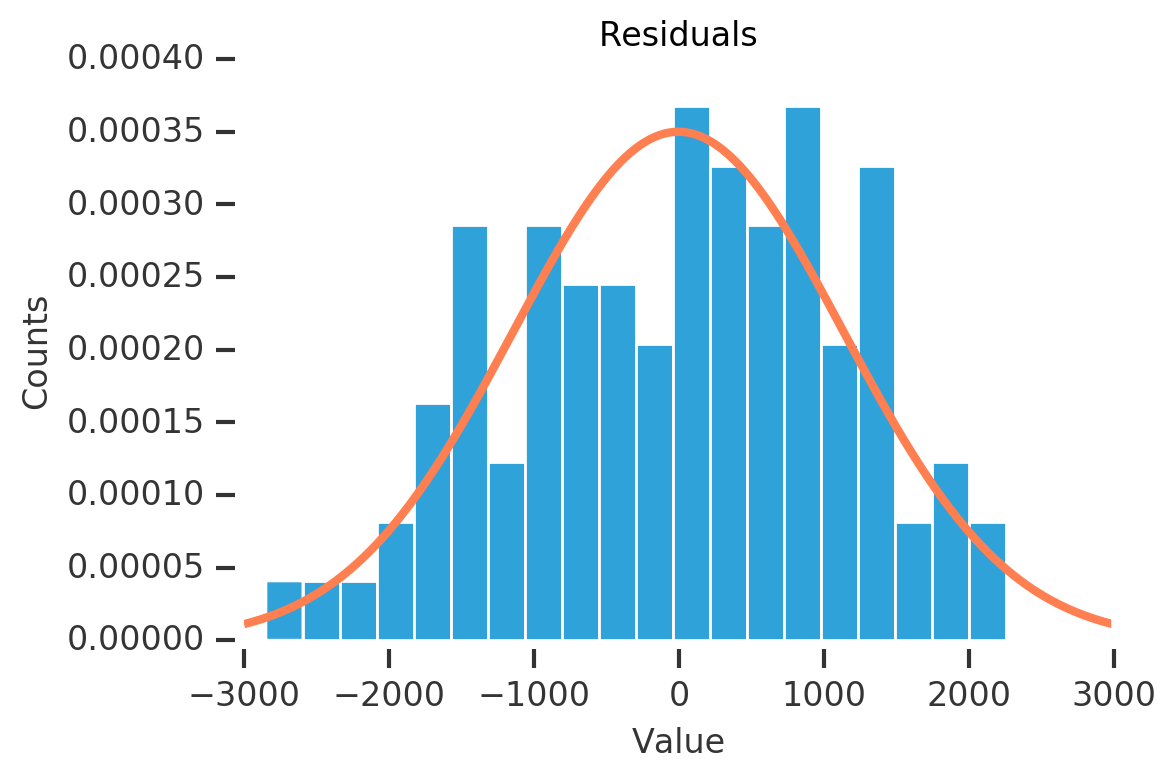

In [54]:
loc, shape = st.norm.fit(carsales_residual)
x=range(-3000,3000)
y = st.norm.pdf(x, loc, shape)
n, bins, patches = plt.hist(carsales_residual, bins=20, normed=True)
plt.plot(x,y, color='Coral')
despine(plt.gca())
plt.title('Residuals')
plt.xlabel('Value'); plt.ylabel('Counts');

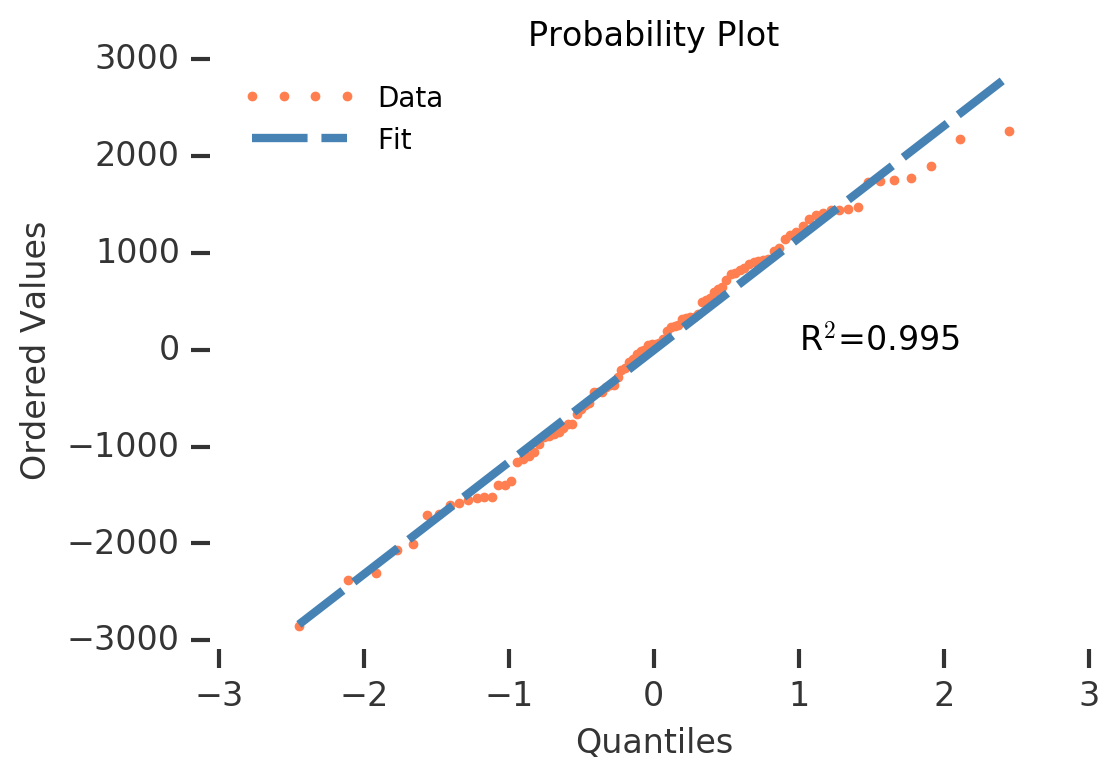

In [55]:
(osm,osr), (slope, intercept, r) = st.probplot(carsales_residual, dist='norm', fit=True)
line_func = lambda x: slope*x + intercept
plt.plot(osm,osr,
         '.', label='Data', color='Coral')
plt.plot(osm, line_func(osm), 
         color='SteelBlue',
         dashes=(20,5), label='Fit')
plt.xlabel('Quantiles'); plt.ylabel('Ordered Values')
despine(plt.gca())
plt.text(1, -14, 'R$^2$={0:.3f}'.format(r))
plt.title('Probability Plot')
plt.legend(loc='best', numpoints=4, handlelength=4);

#### with differencing

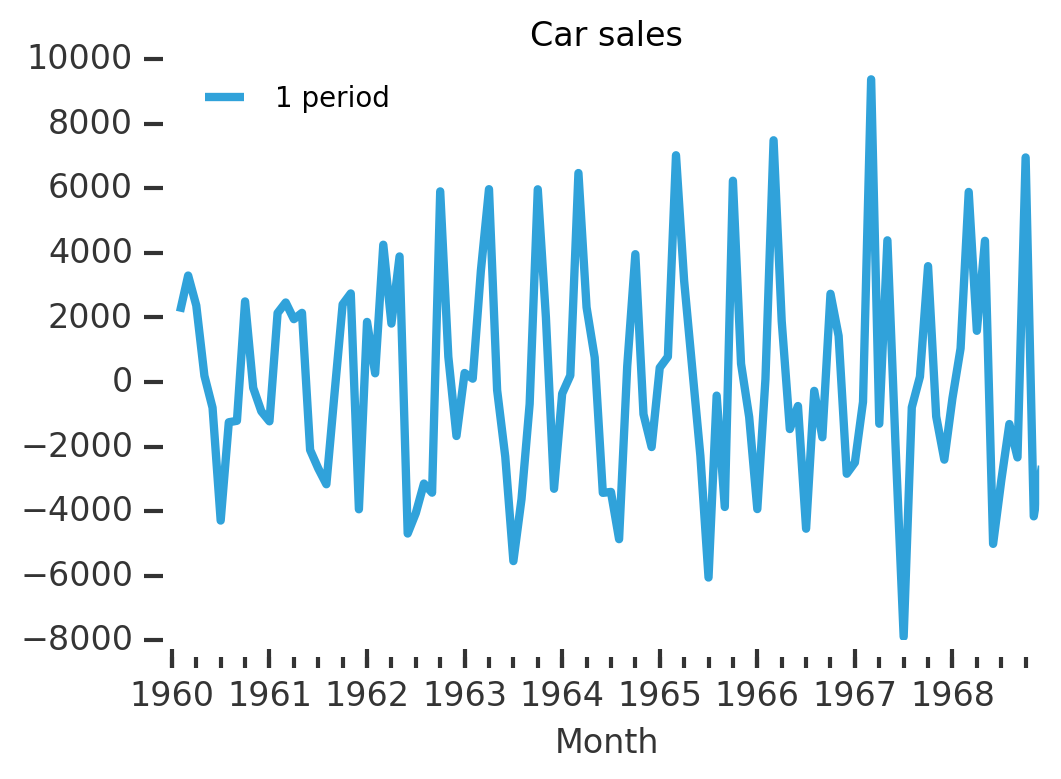

In [57]:
carsales.diff(1).plot(label='1 period', title='Car sales')
plt.legend(loc='best')
despine(plt.gca())

In [58]:
is_stationary(carsales.diff(1).dropna());

adf		 -3.124
p		 0.101
crit. val.	 1%: -4.061, 5%: -3.459, 10%: -3.156
stationary?	 false


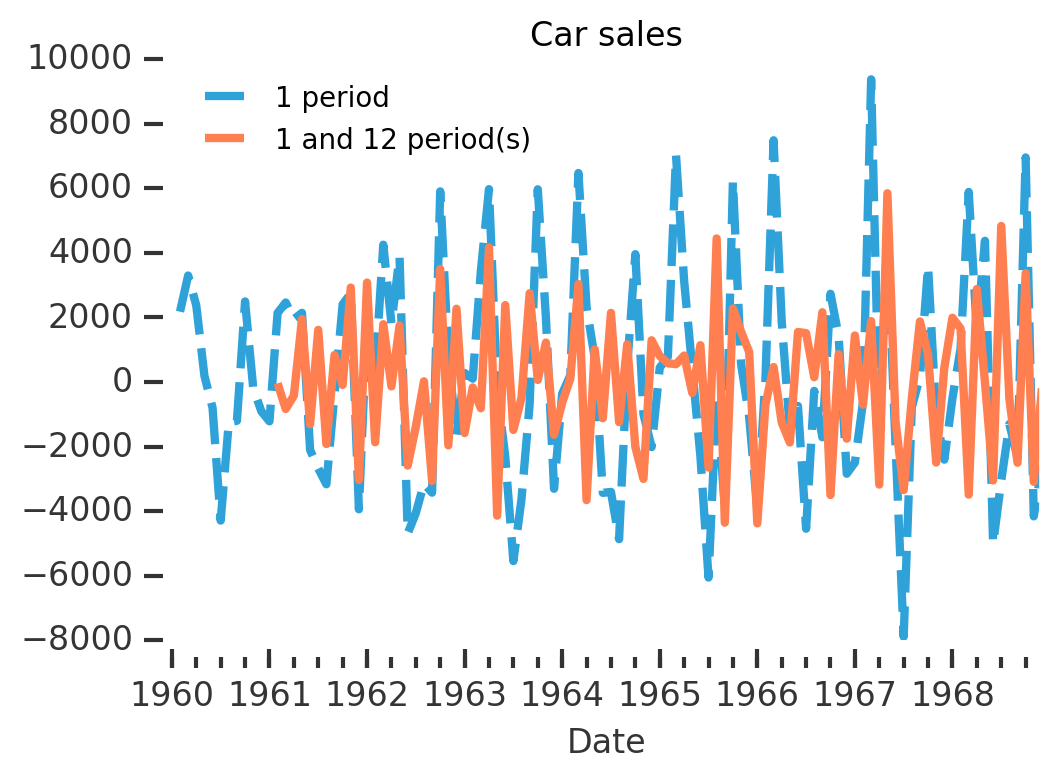

In [59]:
carsales.diff(1).plot(label='1 period', title='Car sales',
                      dashes=(15,5))
carsales.diff(1).diff(12).plot(label='1 and 12 period(s)',
                               color='Coral')
plt.legend(loc='best')
despine(plt.gca())
plt.xlabel('Date')

In [60]:
is_stationary(carsales.diff(1).diff(12).dropna());

adf		 -3.875
p		 0.0131
crit. val.	 1%: -4.077, 5%: -3.467, 10%: -3.160
stationary?	 true


## Time series models

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
is_stationary((carsales-carsales_seasonal).diff(1).dropna());

adf		 -3.611
p		 0.0289
crit. val.	 1%: -4.061, 5%: -3.459, 10%: -3.156
stationary?	 true


In [63]:
ts = carsales-carsales_seasonal
tsdiff = ts.diff(1)

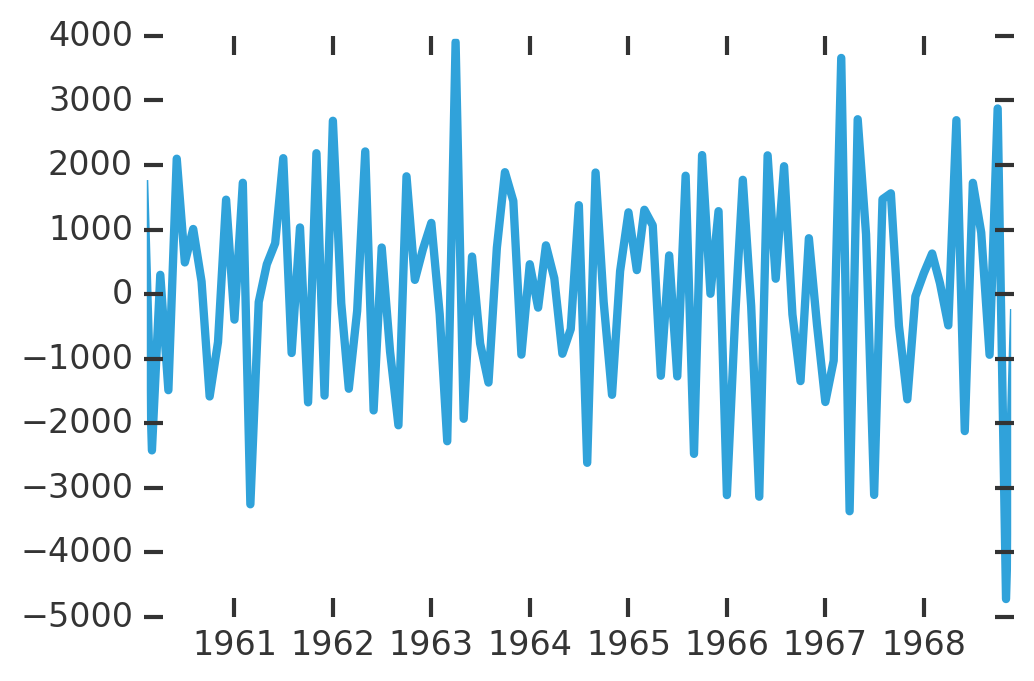

In [64]:
plt.plot(tsdiff)

### Autoregressive model - AR

In [65]:
model = ARIMA(ts, order=(1, 1, 0))  
arres = model.fit()

/Users/santiago/anaconda/lib/python3.5/site-packages/statsmodels/tsa/arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


1870.333181069073 1878.35166757


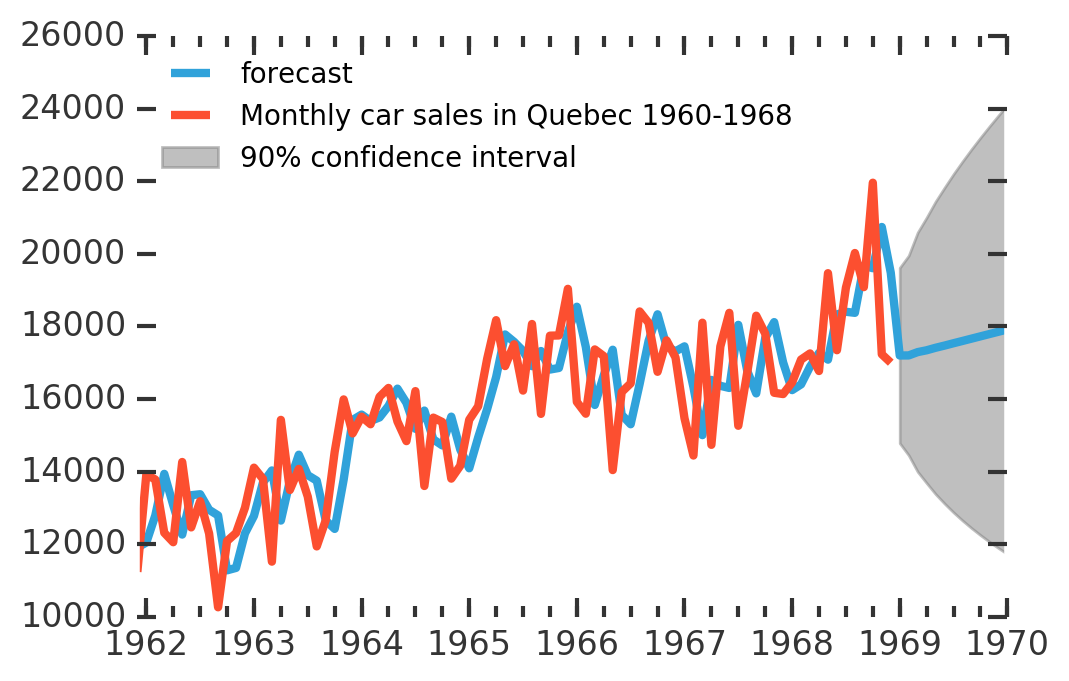

In [66]:
arres.plot_predict(start='1961-12-01', end='1970-01-01', alpha=0.10)
plt.legend(loc='upper left')
print(arres.aic, arres.bic)

### Moving average model - MA

In [67]:
model = ARIMA(ts, order=(0, 1, 1))  
mares = model.fit() 

/Users/santiago/anaconda/lib/python3.5/site-packages/statsmodels/tsa/arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


1853.0753124016755 1861.09379891


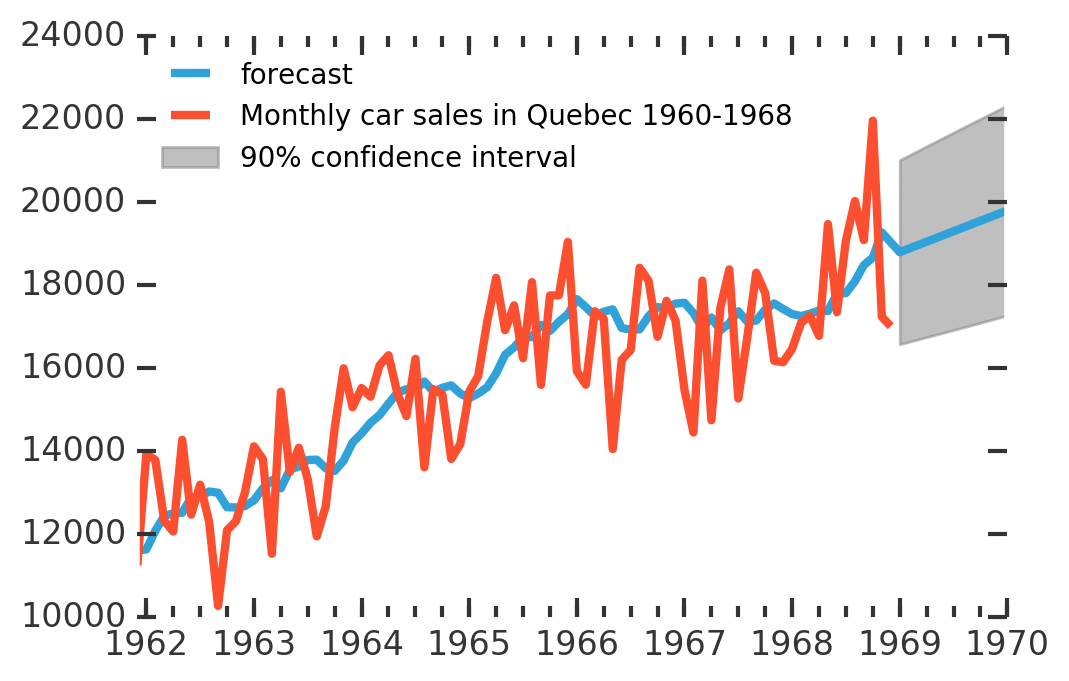

In [68]:
mares.plot_predict(start='1961-12-01', end='1970-01-01', alpha=0.10)
plt.legend(loc='upper left');
print(mares.aic, mares.bic)

### selecting p and q

In [69]:
tsa.stattools.arma_order_select_ic(tsdiff.dropna(), max_ar=2, max_ma=2, ic='aic')

/Users/santiago/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/santiago/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'aic':              0            1            2
 0  1893.258581  1853.075312  1853.070371
 1  1870.333181  1852.567740  1853.880897
 2  1866.617419  1853.644132  1855.613534, 'aic_min_order': (1, 1)}

In [70]:
acf = stt.acf(tsdiff.dropna(), nlags=10)
pacf = stt.pacf(tsdiff.dropna(), nlags=10)

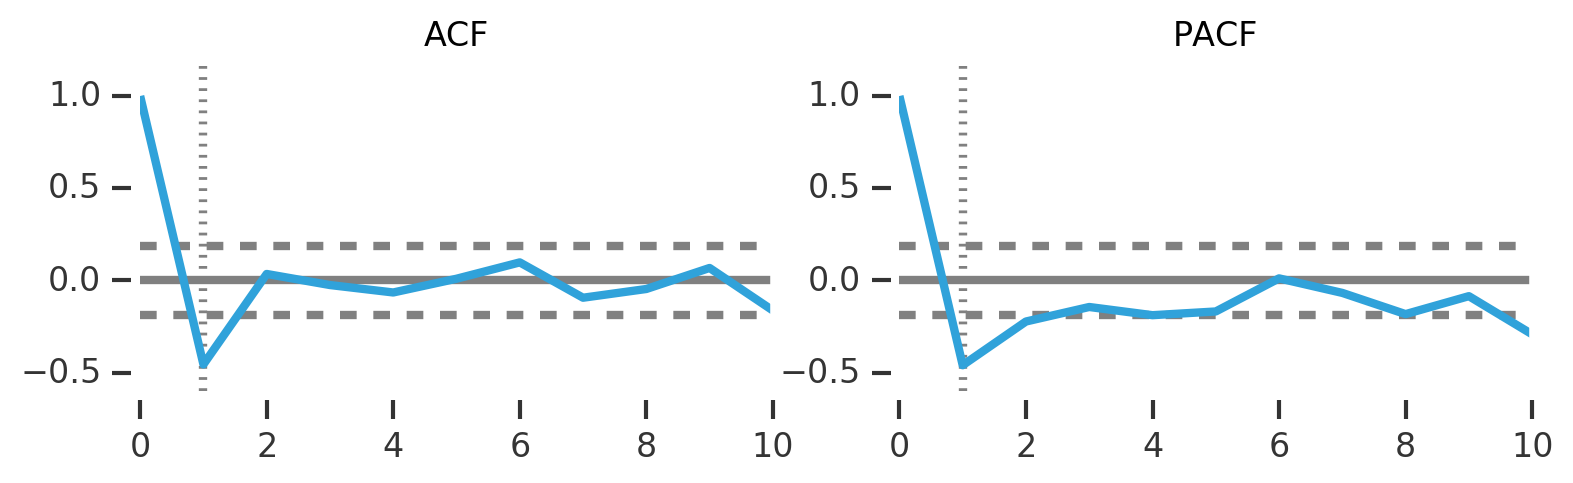

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,2))
ax1.axhline(y=0,color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax1.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax1.axvline(x=1,ls=':',color='gray')
ax1.plot(acf)
ax1.set_title('ACF')

ax2.axhline(y=0,color='gray')
ax2.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax2.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax2.axvline(x=1,ls=':',color='gray')
ax2.plot(pacf)
ax2.set_title('PACF')

despine([ax1,ax2])

### Autoregressive Integrated Moving Average - ARIMA

In [72]:
model = ARIMA(ts, order=(1, 0, 1))  
arimares = model.fit()

/Users/santiago/anaconda/lib/python3.5/site-packages/statsmodels/tsa/arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


1880.00686765318 1890.73539256


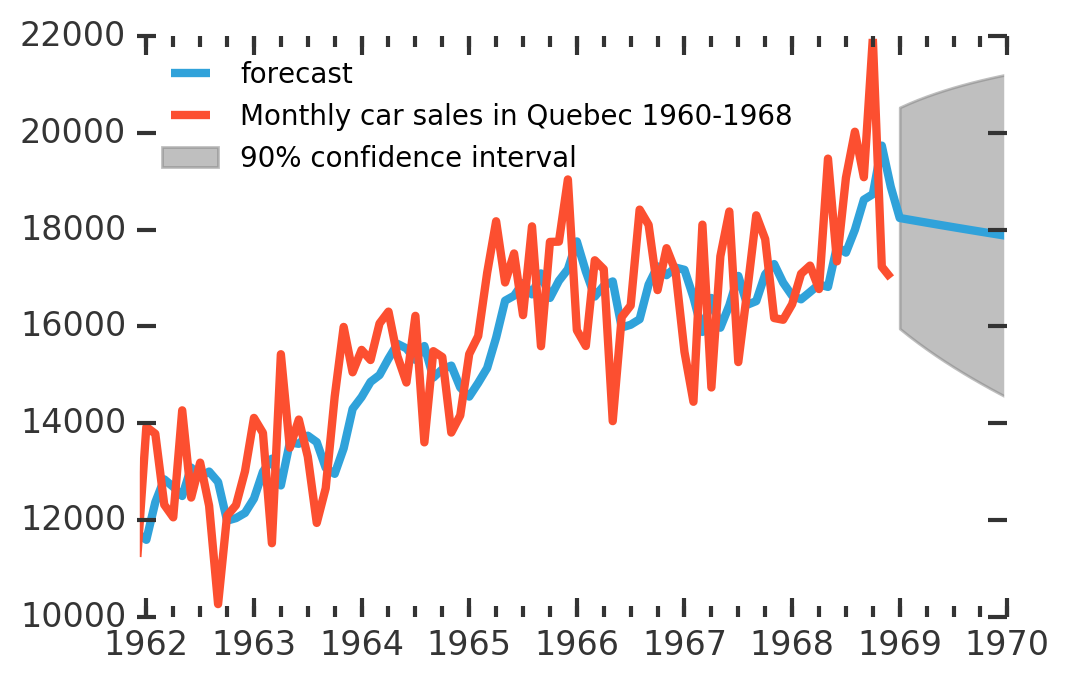

In [73]:
arimares.plot_predict(start='1961-12-01', end='1970-01-01', alpha=0.10)
plt.legend(loc='upper left');
print(arimares.aic, arimares.bic)

In [74]:
arimares.forecast()

(array([ 18238.56843584]),
 array([ 1388.79665349]),
 array([[ 15516.57701316,  20960.55985853]]))

In [76]:
type(arimares.forecast())

tuple

In [83]:
arimares.predict(start=107)

/Users/santiago/anaconda/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


1968-12-01    18882.947811
Freq: MS, dtype: float64

In [81]:
len(ts)

108